<a href="https://colab.research.google.com/github/RutujaJadhav/Baby-got-Back/blob/master/BabyGotBack_projectdetails_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5: Project Report
This homework is very similar to homework 5, except now you've hopefully finished your project! You should fill in each of the sections below based on your results. Note that each section has changed from homework 5, so don't just copy paste, the questions are different!

Only one member of the group should submit this assignment, however, please provide the names of each member of the group here:

**Group Members:**
*   Rutuja Jadhav
*   Gero Bergk
*   Tianke Li
*   Angela Sun

## Task 1: Problem Description
* Describe the functionality of your finished product. Try to explain it as if you were writing for a potential customor.
* Did anything about your project goals change from the beginning of the quarter? What caused the change?
* If you had more time, what would you do differently?

The BGB smart baby monitor solution gives 21st century parents a piece of mind that their infants are resting in safe and comfortable sleeping environments. The main differentiating feature of our product from most baby monitors on the market today, is that it uses an original machine learning model to identify risk factors in the infant's sleeping environment, and alerts parents of these risk factors. These risk factors that we focused on included: pillows, blankets, bottles, and stuffed animals. This smart baby monitor is able to tell how close a risk factor is to the baby's face, and therefore give live feedback on the level of risk posed. 

In addition, the BGB solution offers all the primary selling points of competitor's solutions, including  humidity, temperature threshold sensing and alerting. The BGB solution also includes a complementary web app that allows parents to access all these features via their phone or laptop. 

Because our project goals were pretty specifically and conservatively defined, we did not have to make any major pivots in our process / product. That said, there were a few minor adjustments that occured as we went along. For example, we had originally hoped to create a universally deployable product (i.e., would be able to recognize any baby pillow), but realized quickly after milestone 2 that we would need a much larger dataset to accomplish this goal than we may have time to collect / label within the scope of this project. Therefore, we pivoted to creating a 'demo-able' product that would achieve our target accuracy or above, within our mock environment. Furthermore, although we kept our scope pretty tight from the get-go, we did decide to challenge ourselves to provide a more comprehensive alert feature to parents (i.e., high / medium / low risk levels based on distance of risk factor to baby's face, humidity and temperature threshold alerts).   
 
If we had more time and resources, there are some additional items we would consider pursuing. These include creating a universally deployable solution, developing a mechanism for registering a given baby's personal objects to iteratively add to the dataset and boost accuracy (e.g., analogous to individual user registering their fingerprints when they receive a new iPhone). We'd also love to explore mechanisms for anonyminizing the data we process in the cloud for added security, and designing a battery pack to fit within the enclosure, etc.  

## Task 2: Dataset Description
* How did you collect your dataset?
* What features did your dataset have?
* What were the labels?
* How many samples did you collect?
* What is your final opinion of your dataset? If you could do it again, what would you change?

We had two primary rounds of data collection and processing, and therefore used two different datasets for Milestone 2 and Milestone 3. 

In both of our datasets, we focused on collecting varied images with different size, shape and lighting conditions for our custom object detection model and extract the features using **Convolutional Neural Network** which typically extracts features as geometric shapes, edges in the intial layes and more prominent features as patterns of the object (eg:eyes, hair in case detecting the baby) in the deeper layers. 

The labels we used included: pillow, blanket, stuffed animal, bottle, and baby (face). Our first dataset comprised ~1,600 samples and our second sample comprised ~1,900 samples (~1,600 in day light, ~300 in infrared night time environment). See below for a break down of the sample size for each label type.  
Our datasets can be accessed here:
[Daylight](https://drive.google.com/open?id=1z4DltxVmQ8shPYI0Sfr20T-qFunFtwiN)
[Infrared](https://drive.google.com/open?id=16HE5g9KktlSYTgrBVlYma91ic9JFNYqC)




The reason we created a second dataset was because our first dataset comprised primarily images that were collected from the internet (daylight only). These images included a lot of 'noise' as well as variance in setting, angle, image clarity, etc. that produced sub-par results. We were working with quite a few categories of items to label, some of which include significant variance in manifestation (e.g., blankets in particular could come in many different shapes, sizes, form factors, colors, etc.) This made it challenging to achieve our target accuracy without a much, much larger dataset. Furthermore, due to miscommunication within our team, our first dataset also included some variance in labeling precision that presented further challenges. We also created an over-engineered labeling system (e.g., adding many sub-labels - blanket folded vs. not, etc.) that slowed down our labeling speed. 

Therefore, we created a brand new dataset for milestone 3. For this dataset, we trained it on entirely new images collected from our own mock environment set-up and props. Using an infrared light source, we also captured infrared images. We kept the camera position constant when capturing these images as well. We simplified our labeling system to just the high level item categories and focused on baby face instead of the entire baby. Overall, we were much happier with the process, quality and outcomes of our second dataset. If we could do it one more time, we would also want to think through how to label scenarios where the baby's face might be covered, say by a blanket or pillow,--as that is also a real-life scenario that could indicate safety risks.  

## Task 3: Model Design
* What type of architecture did you use? Was it the same as you expected? If not, why?
* Show the structure of your architecture (graphic here)

We used **Faster-RCNN inception V2** as our model and finetuned it to meet our requirements which is same as we expected earlier.

We trained two different models to detect our objects in daylight and infrared environment. The processing was directed to infrared/daylight depending upon the luminosity of the images in lab color space using opencv. The structure has been depicted below.

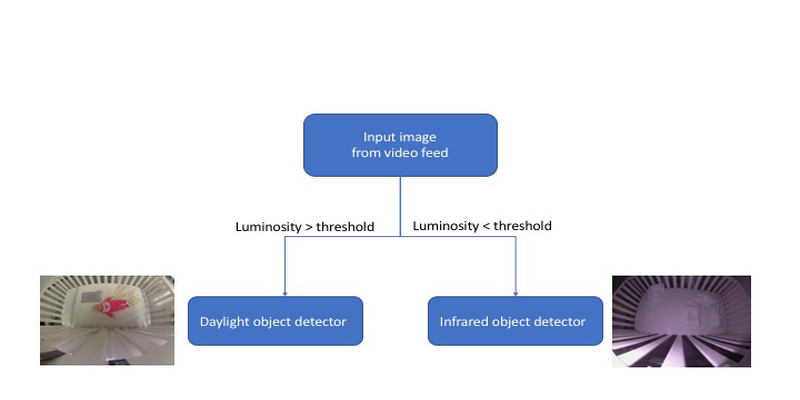

In [0]:
from PIL import Image
im=Image.open(open("Slide2.jpeg", 'rb'))
im.resize((800,400),Image.ANTIALIAS)

**The model structure for RCNN**

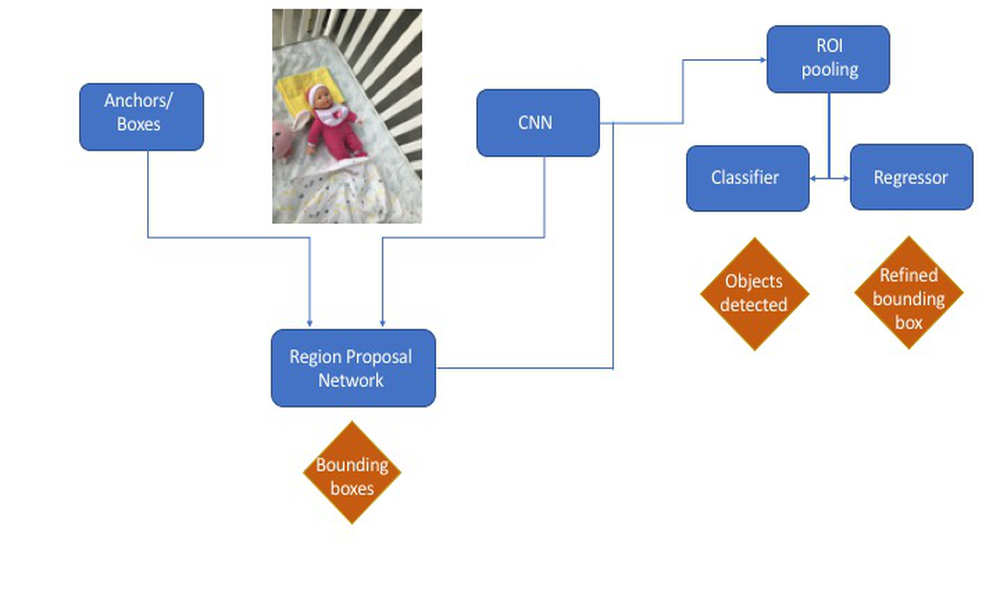

In [0]:
from PIL import Image
im=Image.open(open("Presentation1.jpg", 'rb'))
im.resize((1000,600),Image.ANTIALIAS)

## Task 4: Training
* What was your final training and test accuracy? How many epochs did it take to reach that?
* Did you encounter any unexpected issues during training?

With 3 rounds of training, our final accuracy was as 90.8%. It took 20,000 epochs to reach a decent accuracy with training time of 3-4 hours.

Additional details on training can be found here:
https://github.com/RutujaJadhav/Baby-got-Back/blob/master/BABY_GOT_BACK_milestone_2.ipynb

**Unexpected issues**
The model being heavy took a longer time than expected to train and hence made iterative testing with variations in the datasets slightly challenging.
We ran into overfitting issues which were spotted after a couple of hours of training which was taken care of by adding augmentation layer with L2-regularization. 

**Daylight model performance**

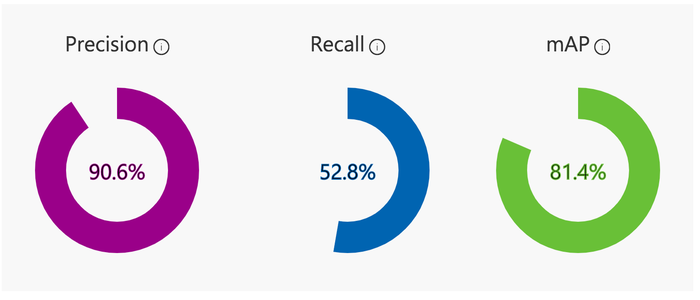

In [0]:
from PIL import Image
im=Image.open(open("daylight-performance.png", 'rb'))
im.resize((700,300),Image.ANTIALIAS)

**Infrared model performance**

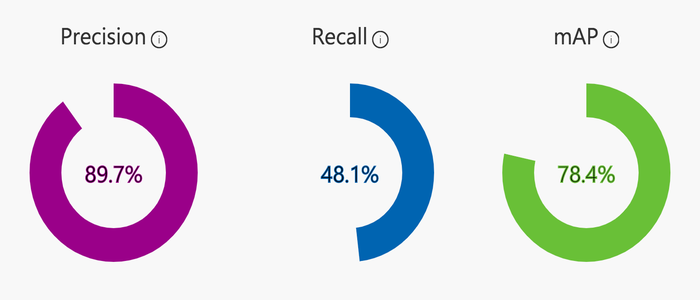

In [0]:
from PIL import Image
im=Image.open(open("infrared-performance.png", 'rb'))
im.resize((700,300),Image.ANTIALIAS)

## Task 5: Deployment
* Describe the method used to fun your model, how did it fit into the rest of your system?
* Are you happy with how the project turned out? Why or why not?

**System design**

-We moved our processing to cloud using Azure custom vision and used it for processing our input feed from Raspberry Pi. 

-The Twilio API was used to send text alerts to parents when there were high risk factors in the crib as objects being too close to the baby leading to a suffocating environment.

-We also used temperature, humidity sensors to give more information about the baby's sleeping environment.

-We used Flask to integrate all the data and display on our dashboard.


We as a team are happy with how our project turned out- the performance of the model, hardware design to be despite of the time contraints we had. 

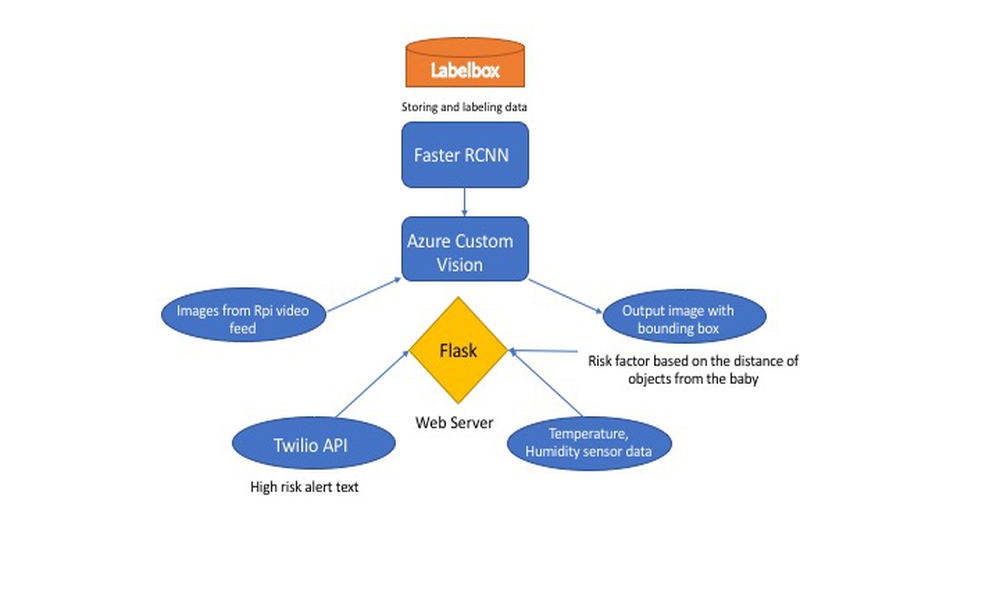

In [0]:
from PIL import Image
im=Image.open(open("system-dia-software.jpg", 'rb'))
im.resize((1000,600),Image.ANTIALIAS)

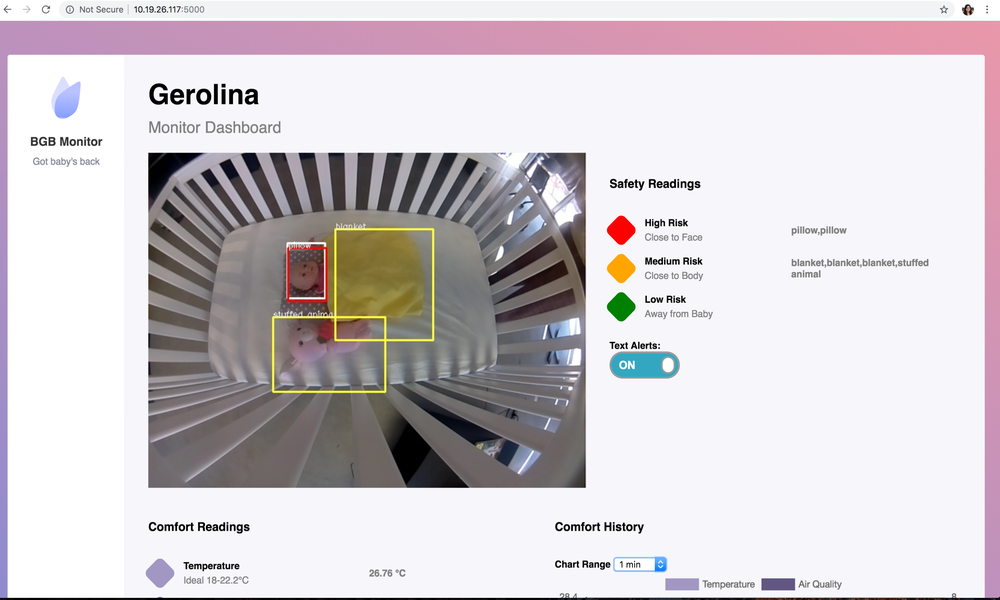

In [0]:
from PIL import Image
im=Image.open(open("bgb-daylight.png", 'rb'))
im.resize((1000,600),Image.ANTIALIAS)

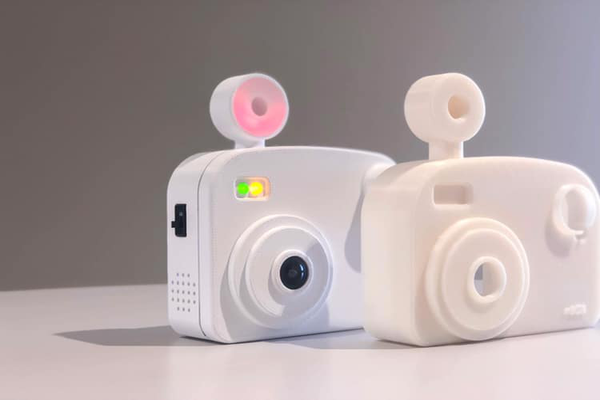

In [0]:
from PIL import Image
im=Image.open(open("bgb-1.jpg", 'rb'))
im.resize((600,400),Image.ANTIALIAS)

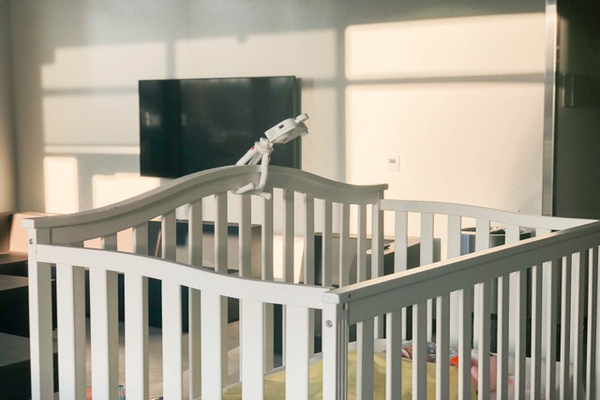

In [0]:
from PIL import Image
im=Image.open(open("b2.jpg", 'rb'))
im.resize((600,400),Image.ANTIALIAS)

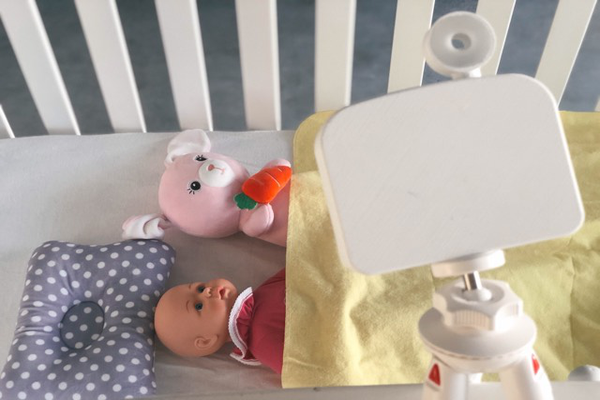

In [0]:
from PIL import Image
im=Image.open(open("b1.jpg", 'rb'))
im.resize((600,400),Image.ANTIALIAS)